## EXERCISE 1: Search of the best C

Create a SVM with linear kernel using the scikit-learn library. 

Verify the performance with different values of the hyperparameter C using the function [logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html), nel range -20:0:20. 

> __QUESTION 1(a):__  Check the best configuration of C, using the 3-fold cross-validation on the digits dataset. 

> __QUESTION 1(b):__ Plot the score achieved in each configuration, by showing the different values for C in the x-axis and CV score in y-axis. Suggestion: Use the log-scale.

> __QUESTION 1(c):__ Train and test the model with the best configuration found at the previous step



La migliore configurazione ha C=0.0006951927961775591, con punteggio medio di 0.9460211463550361


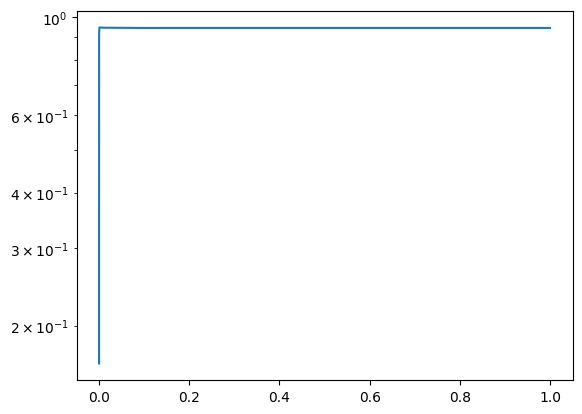

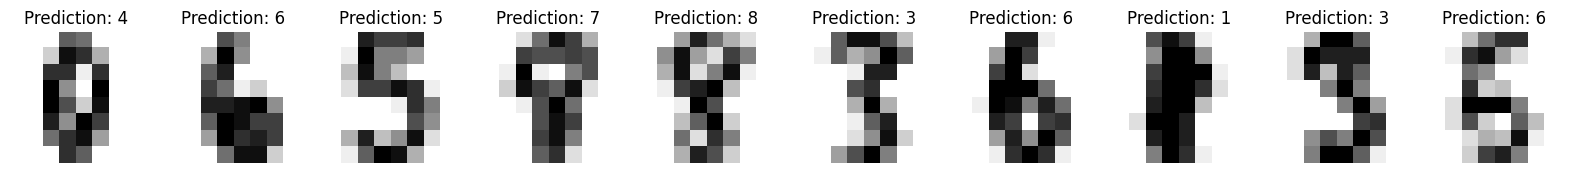

In [2]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import random

# preparare il dataset
digits_dataset = datasets.load_digits()
n_samples = len(digits_dataset.images)
reshaped_data = digits_dataset.images.reshape((n_samples, -1)) #-1 => 1-D

# generare gli SVC, effettuare validation
C_values = np.logspace(-20, 0, 20)
#print(f"Valori di C: {C_values}\n")
C_avg_scores = []
for C in C_values:
    clf = svm.SVC(kernel='linear', C=C)
    C_scores = cross_val_score(clf, reshaped_data, digits_dataset.target, cv=3)
    #print(f"C={C} => {C_scores} => {np.sum(C_scores)} => {np.sum(C_scores)/3}")
    a = np.mean(C_scores)
    C_avg_scores.append(a)

# trovare migliore
C_avg_scores = np.array(C_avg_scores)
best_C_index = np.argmax(C_avg_scores)
best_C = C_values[best_C_index]
#print("\n")
#print(C_avg_scores)
print(f"\nLa migliore configurazione ha C={best_C}, con punteggio medio di {C_avg_scores[best_C_index]}")

# plottare punteggi
plt.plot(C_values, C_avg_scores, '-')
plt.yscale('log')
plt.show()

# train SVC
clf = svm.SVC(kernel='linear', C=best_C)
x_train, x_test, y_train, y_test = train_test_split(
    reshaped_data, digits_dataset.target, test_size=0.25, shuffle=False)
clf.fit(x_train, y_train)
digits_predicted = clf.predict(x_test)

random.seed()
test_samples = np.shape(x_test)[0]
els = np.array([random.randrange(test_samples) for i in range(11)])
x_test_rand = x_test[els]
digits_predicted_rand = digits_predicted[els]

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, prediction in zip(axes, x_test_rand, digits_predicted_rand):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## EXERCISE 2: SVM on the iris_dataset

Load the iris dataset from the dataset available at this [link](https://scikit-learn.org/stable/datasets/toy_dataset.html).

> __QUESTION 2(a):__  Verify the proprieties (number of samples, number of classes, etc.) of the dataset as we did during the lecture with the digit dataset. 

> __QUESTION 2(b):__ Split the dataset in training and test according to the following percentages: 70% - 30%

> __QUESTION 2(c):__ Train a SVM with different kernel (linear, rbf, polinomial) by leaving the default values for the hyperparameters

> __QUESTION 2(d):__ Test the achieved models on the test set

> __QUESTION 2(e):__ Represent the performances achieved for each kernel in the form of confusion matrix


### QUESTION 2(a)

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

iris_dataset = datasets.load_iris()
iris_data = iris_dataset.data
n_iris = iris_data.shape[0]
print(f"[{iris_data[0]}\n {iris_data[1]}\n {iris_data[2]}\n ...")
print(f" {iris_data[n_iris-3]}\n {iris_data[n_iris-2]}\n {iris_data[n_iris-1]}]")
# sepal length in cm, sepal width in cm, petal length in cm, petal width in cm

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 ...
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


In [4]:
print(iris_dataset.data.shape)

(150, 4)


In [5]:
iris_target = iris_dataset.target
print(np.unique(iris_dataset.target))
print(iris_dataset.target.shape)

[0 1 2]
(150,)


### QUESTION 2(b)

In [6]:
from sklearn.model_selection import cross_val_score, train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    iris_data, iris_target, train_size=0.7, shuffle=False
)

### QUESTION 2(c)

In [7]:
from sklearn import svm

clf_linear = svm.SVC(kernel='linear')
clf_rbf = svm.SVC(kernel='rbf')
clf_poly = svm.SVC(kernel='poly')

clf_linear.fit(x_train, y_train)
clf_rbf.fit(x_train, y_train)
clf_poly.fit(x_train, y_train)

SVC(kernel='poly')

### QUESTION 2(d)

In [8]:
predicted_linear = clf_linear.predict(x_test)
predicted_rbf = clf_rbf.predict(x_test)
predicted_poly = clf_poly.predict(x_test)

### QUESTION 2(e)

Text(0.5, 0.98, 'Confusion Matrix for polynomial kernel')

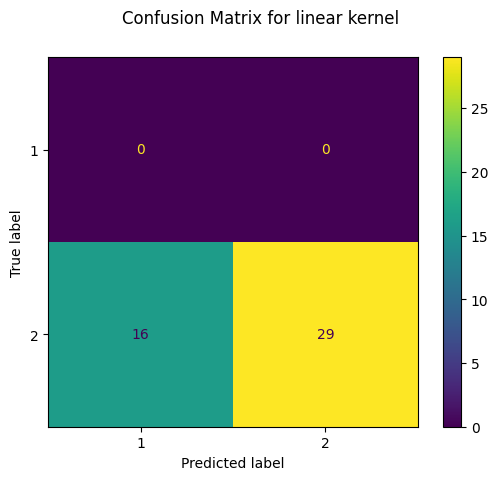

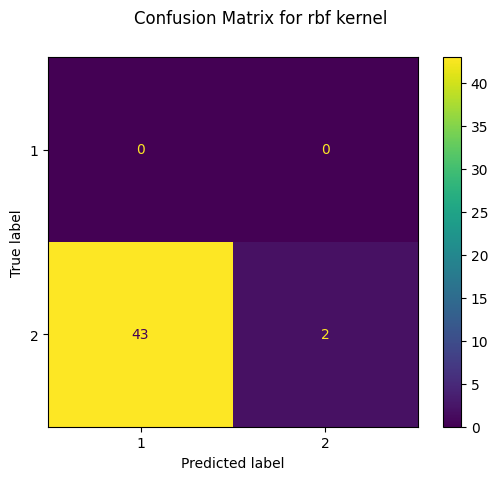

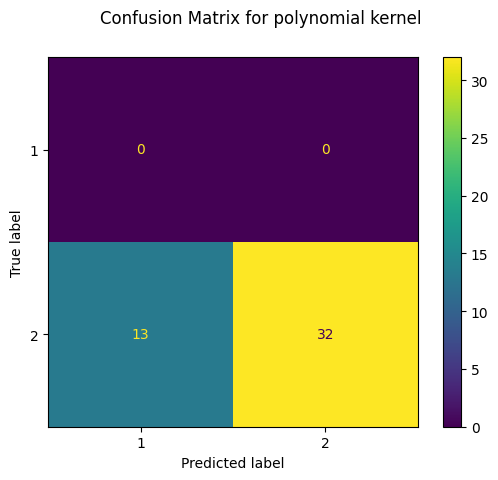

In [10]:
from sklearn import metrics

disp_linear = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_linear)
disp_linear.figure_.suptitle("Confusion Matrix for linear kernel")

disp_rbf = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_rbf)
disp_rbf.figure_.suptitle("Confusion Matrix for rbf kernel")

disp_poly = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_poly)
disp_poly.figure_.suptitle("Confusion Matrix for polynomial kernel")
#print(f"Confusion matrix:\n{disp_linear.confusion_matrix}")

#plt.show()